<a href="https://colab.research.google.com/github/EunjiPark0120/Eunji/blob/master/%EB%B6%84%EC%84%9D_2%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C_%EB%B0%95%EC%9D%80%EC%A7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 분석 2주차 과제

# 1. LinearRegression

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# 단순선형회귀
list_y = []
# 1부터 20까지 X data를 만들어주었습니다.
X = np.arange(1,21) 
# X에 임의의 수를 더해 임의의 Y data를 만듭니다.
for x in X:
    list_y.append(x+np.random.randint(6))
Y = np.array(list_y)
df = pd.DataFrame({'X':X,'Y':Y})

In [ ]:
# 데이터 확인
df.shape

(20, 2)

In [ ]:
df.head()

,X,Y
0,1,6
1,2,6
2,3,7
3,4,8
4,5,8


**LinearRegressoion을 이용하여 X data에 대해 학습을 진행한 후 직선의 방정식을 구해주세요.**

[답] : $y = 0.967 * X + 3.547$

In [ ]:
# 모델 생성 후 학습시키기
X = df['X']
Y = df['Y']
line_fitter = LinearRegression()
line_fitter.fit(X.values.reshape(-1,1), Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# 회귀계수 구해보기
print("회귀계수 : " , line_fitter.coef_.round(3) )

회귀계수 :  [0.939]


In [ ]:
# 상수항 구해보기
print("상수항 : " , line_fitter.intercept_.round(3) )

상수항 :  3.789


**X data에 대해 예측을 수행한 후, 그래프를 통해 학습데이터와 회귀직선을 나타내보세요.**

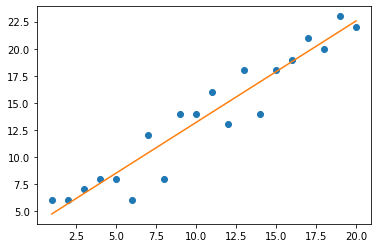

In [ ]:
# X data에 대해 예측
Y_predeic = line_fitter.predict(X.values.reshape(-1,1))

# 점(학습데이터)들 찍어보기
plt.plot(X, Y, 'o')

# 회귀직선 그려보기
plt.plot(X,line_fitter.predict(X.values.reshape(-1,1)))
plt.show()

**회귀분석 평가지표 중 하나를 골라 구해보세요**
- MSE, RMSE, R2_score 등

In [ ]:
# 여기에 구해보세요!
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y, Y_predeic)
rmse = np.sqrt(mse)
r2 = r2_score(Y, Y_predeic)

print("MSE score : ", mse)
print("RMSE score : ", rmse)
print("r2 score : ", r2)


MSE score :  2.804172932330828
RMSE score :  1.6745664908658682
r2 score :  0.9127173626229608


# Logistic Regression

In [ ]:
# 사이킷런의 데이터셋 로드
from sklearn.datasets import load_breast_cancer

In [ ]:
breast_cancer = load_breast_cancer()
df = pd.DataFrame(data = breast_cancer.data, columns = breast_cancer.feature_names)
df["label"] = breast_cancer.target
df.columns = [ col.replace(" ", "_") for col in df.columns]

In [ ]:
# 데이터가 잘 로드되었는지 확인해보세요
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,radius_error,texture_error,perimeter_error,area_error,smoothness_error,compactness_error,concavity_error,concave_points_error,symmetry_error,fractal_dimension_error,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
df.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
       'radius_error', 'texture_error', 'perimeter_error', 'area_error',
       'smoothness_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
       'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
       'worst_smoothness', 'worst_compactness', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension',
       'label'],
      dtype='object')

## **[변수 설명]** 
radius : 반경(중심에서 외벽까지 거리들이 평균값) <br>
texture : 질감 <br>
perimeter : 둘레 <br>
area : 면적 <br>
smoothness : 매끄러움 <br>
compactness : 조그만 정도<br>
concavity : 오목함(윤곽의 오목한 부분의 정도)<br>
points : 오목한 점의 수<br>
symmetry : 대칭<br>
dimension : 프랙탈 차원<br>

In [ ]:
# 이번엔 mean이 들어간 변수만 사용해보겠습니다!
# mean이 들어간 변수만 따로 뽑아 X와 Y데이터를 만들어주세요.
X = df.iloc[:,0:10]
Y = df['label']

In [ ]:
X.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


**Heatmap을 통해 X변수 간 상관관계를 확인해보세요!**

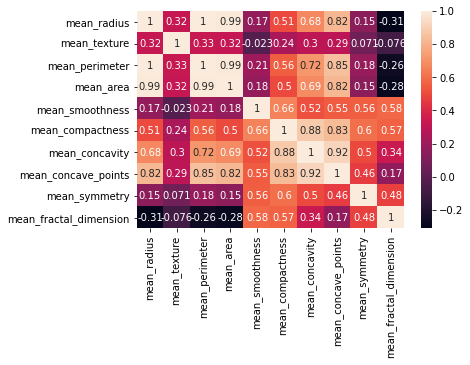

In [ ]:
# heatmap을 통해 상관관계 확인
import seaborn as sns    
sns.heatmap(data = X.corr(), annot=True )

**강한 상관관계가 있는 변수들을 적어보세요!
그리고 다중공선성과 그로 인한 문제에 대해 서술해주세요.**
1. 다중공선성은 선형회귀모델에서 독립변수간에 상관관계가 강한 것으로, 다중공선성 문제로 인해 모델에서 변수 각각의 설명력이 약해질 수 있습니다.

2. 강한 상관관계를 가진 변수는 아래 DF와 같습니다. <br>

Q. 이때, 중복행 (e.g., (A,B)와 (B,A)처럼 중복되는 행)을 삭제할 방법을 고민해봤는데 모르겠습니다. 😥

In [ ]:
X_corr_stack = pd.DataFrame(X.corr().stack(-1), columns=['corr'])
X_corr_stack_high = X_corr_stack[(X_corr_stack['corr']>0.8) & (X_corr_stack['corr']!=1.0)]
X_corr_stack_high

corr
mean_radius         mean_perimeter       0.997855
                    mean_area            0.987357
                    mean_concave_points  0.822529
mean_perimeter      mean_radius          0.997855
                    mean_area            0.986507
                    mean_concave_points  0.850977
mean_area           mean_radius          0.987357
                    mean_perimeter       0.986507
                    mean_concave_points  0.823269
mean_compactness    mean_concavity       0.883121
                    mean_concave_points  0.831135
mean_concavity      mean_compactness     0.883121
                    mean_concave_points  0.921391
mean_concave_points mean_radius          0.822529
                    mean_perimeter       0.850977
                    mean_area            0.823269
                    mean_compactness     0.831135
                    mean_concavity       0.921391

**강한 상관관계를 가진 변수 중 일부 변수를 선택하여 X 변수를 다시 만들어주세요.**

In [ ]:
from sklearn.model_selection import train_test_split
X = X[['mean_radius','mean_area','mean_perimeter']]
# 학습 데이터와 테스트 데이터 분할
X_tr,X_te,Y_tr,Y_te = train_test_split(X, Y, test_size=0.3, random_state=1)

**로지스틱 회귀 모델 생성 후, test data에 대해 예측을 수행해주세요.**

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_tr, Y_tr)
Y_pre = LR.predict(X_te)

**Confusion Matrix를 구하고 이를 이용하여 accuracy, precision, recall을 직접 구해보세요!**

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
 confusion_matrix(Y_te, Y_pre)

array([[ 48,  15],
       [  8, 100]])

In [ ]:
# accuracy = (TP+TN)/(TP+TN+FP+FN)
accuracy = (48+100) / (48+15+8+100) ; accuracy

0.8654970760233918

In [ ]:
# precision = (TP)/(TP+FP)
precision = 100 / (15+100) ; precision

0.8695652173913043

In [ ]:
# recall = (TP)/(TP+FN)
recall = 100 / (8+100) ; recall

0.9259259259259259

**회귀계수를 구해보고 그 중 변수 2개를 골라 결과를 해석해보세요! (logit관점/odds관점) **

[답] <br> 
1. logit 관점<br> 
1) mean_radius가 1만큼 증가하면 logit은 3.9만큼 증가한다.<br> 
2) mean_area가 1만큼 증가하면 logit은 0.02만큼 감소한다.<br>

2. odds 관점 <br>
1) mean_radius가 1만큼 증가하면  label이 1일 확률은 49.26만큼 증가한다.<br> 
2) mean_area가 1만큼 증가하면  label이 1일 확률 0.98만큼 증가한다.<br>


In [ ]:
# 로지스틱 회귀의 회귀계수
print(X.columns)
print("회귀계수:", LR.coef_.round(2))
print("odds:", np.exp(LR.coef_).round(2))

Index(['mean_radius', 'mean_area', 'mean_perimeter'], dtype='object')
회귀계수: [[ 3.9  -0.02 -0.46]]
odds: [[49.26  0.98  0.63]]


### 주어진 데이터셋을 이용하여 주어진 문제를 해결해주세요.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## - Feature Scaling

In [ ]:
from sklearn.datasets import load_iris

#iris 데이터셋 로드
iris=load_iris()
iris_data=iris.data
iris_df=pd.DataFrame(data=iris_data, columns=iris.feature_names)

iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


#### 1. iris 데이터셋에 MinMaxScaler를 적용하고 각 칼럼별 평균과 분산을 구하세요.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
minmax.fit(iris_df)
iris_scaled = minmax.transform(iris_df)
iris_scaled_df = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)

print("feature 평균")
print(iris_scaled_df.mean())
print("feature 분산")
print(iris_scaled_df.var())


feature 평균
sepal length (cm)    0.428704
sepal width (cm)     0.440556
petal length (cm)    0.467458
petal width (cm)     0.458056
dtype: float64
feature 분산
sepal length (cm)    0.052908
sepal width (cm)     0.032983
petal length (cm)    0.089522
petal width (cm)     0.100869
dtype: float64


#### 2. iris 데이터셋에 StandardScaler를 적용하고 각 칼럼별 평균과 분산을 구하세요.

In [ ]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(iris_df)
iris_scaled = std.transform(iris_df)
iris_scaled_df = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)

print("feature 평균")
print(iris_scaled_df.mean())
print("feature 분산")
print(iris_scaled_df.var())


feature 평균
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64
feature 분산
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


#### 3. normalization과 standardization의 차이점을 설명하세요.

normalization과 standardization은 모두 스케일이 다른 피쳐들의 영향력 비슷한 수준으로 맞춰 모델에 반영하기 위한 전처리방법이다. <br>
normalization(정규화)는 일반적으로 최대값과 최소값 1과 0로 변환하는 것으로, 데이터의 위치를 파악하기 용이하다. <br>
standardization(표준화)는 평균이 0이고 표준편차가 1인 정규분포를 따르도록 피쳐의 스케일을 변환하는 것으로, 이상치를 확인하기 용이하다.

## - Regularization

In [ ]:
from sklearn.datasets import load_boston

#boston 집값 데이터셋 로드
boston=load_boston()
boston_price=boston.target
boston_data=boston.data
boston_df=pd.DataFrame(data=boston_data, columns=boston.feature_names)

boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


#### 4. training data와 test data를 분리해주세요(비율 자유)

In [ ]:
from sklearn.model_selection import train_test_split
X_tr,X_te,Y_tr,Y_te = train_test_split(boston.data, boston.target, test_size=0.3, random_state=120)

#### 5. LinearRegression, Ridge, Lasso 각각의 방법으로 모델을 학습시키고 예측하여 RMSE값을 구해주세요. 세 경우의 RMSE값을 비교해주세요.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# LinearRegression
linear = LinearRegression()
linear.fit(X_tr, Y_tr)
Y_pre = linear.predict(X_te)

mse = mean_squared_error(Y_te, Y_pre)
linear_rmse = np.sqrt(mse)
print("RMSE 값 : ", linear_rmse)

RMSE 값 :  5.327281725195684


In [ ]:
#Ridge
ridge = Ridge()
ridge.fit(X_tr, Y_tr)
Y_pre = ridge.predict(X_te)

mse = mean_squared_error(Y_te, Y_pre)
ridge_rmse = np.sqrt(mse)
print("RMSE 값 : ", ridge_rmse)

RMSE 값 :  5.397416199649931


In [ ]:
#Lasso
lasso = Lasso()
lasso.fit(X_tr, Y_tr)
Y_pre = lasso.predict(X_te)

mse = mean_squared_error(Y_te, Y_pre)
lasso_rmse = np.sqrt(mse)
print("RMSE 값 : ", lasso_rmse)

RMSE 값 :  5.869552531643586


In [ ]:
#RMSE과 비교
print("LinearRegression : ", linear_rmse.round(3))
print("Ridge : ", ridge_rmse.round(3))
print("Lasso : ", lasso_rmse.round(3))

LinearRegression :  5.327
Ridge :  5.397
Lasso :  5.87


### 5-1 MinMax 스케일링 후 RMES 값 변화를 확인해보기

In [ ]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


피쳐 스케일간의 차이가 많이 있습니다. 전체 피쳐를 MinMaxScaler 후 다시 RMES 값을 비교해보겠습니다

In [ ]:
#MinMaxScasler
minmax = MinMaxScaler()
minmax.fit(boston_df)
boaston_scaled = minmax.transform(boston_df)
boaston_scaled_df = pd.DataFrame(boaston_scaled, columns=boston.feature_names)

X_tr,X_te,Y_tr,Y_te = train_test_split(boaston_scaled_df, boston.target, test_size=0.3, random_state=120)


In [ ]:
#각 피쳐의 min이 0, max가 1입니다.
boaston_scaled_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.040544,0.113636,0.391378,0.069170,0.349167,0.521869,0.676364,0.242381,0.371713,0.422208,0.622929,0.898568,0.301409
std,0.096679,0.233225,0.251479,0.253994,0.238431,0.134627,0.289896,0.191482,0.378576,0.321636,0.230313,0.230205,0.197049
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000851,0.000000,0.173387,0.000000,0.131687,0.445392,0.433831,0.088259,0.130435,0.175573,0.510638,0.945730,0.144040
50%,0.002812,0.000000,0.338343,0.000000,0.314815,0.507281,0.768280,0.188949,0.173913,0.272901,0.686170,0.986232,0.265728
75%,0.041258,0.125000,0.646628,0.000000,0.491770,0.586798,0.938980,0.369088,1.000000,0.914122,0.808511,0.998298,0.420116
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# LinearRegression
linear = LinearRegression()
linear.fit(X_tr, Y_tr)
Y_pre = linear.predict(X_te)

mse = mean_squared_error(Y_te, Y_pre)
linear_rmse = np.sqrt(mse)

#Ridge
ridge = Ridge()
ridge.fit(X_tr, Y_tr)
Y_pre = ridge.predict(X_te)

mse = mean_squared_error(Y_te, Y_pre)
ridge_rmse = np.sqrt(mse)

#Lasso
lasso = Lasso()
lasso.fit(X_tr, Y_tr)
Y_pre = lasso.predict(X_te)

mse = mean_squared_error(Y_te, Y_pre)
lasso_rmse = np.sqrt(mse)

print("MinMaxScale 결과")
print("LinearRegression : ", linear_rmse.round(3))
print("Ridge : ", ridge_rmse.round(3))
print("Lasso : ", lasso_rmse.round(3))

MinMaxScale 결과
LinearRegression :  5.327
Ridge :  5.425
Lasso :  8.775


### 5-2 Strandization 후 RMES 값 변화를 확인해보기

In [ ]:
strandard = StandardScaler()
strandard.fit(boston_df)
boaston_scaled2 = strandard.transform(boston_df)
boaston_scaled_df2 = pd.DataFrame(boaston_scaled2, columns=boston.feature_names)

X_tr,X_te,Y_tr,Y_te = train_test_split(boaston_scaled_df2, boston.target, test_size=0.3, random_state=120)


In [ ]:
#각 피쳐의 평균이 0, 표준편차가 1입니다.
boaston_scaled_df2.describe().round(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000
mean,-0.000,-0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000
std,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001
min,-0.420,-0.488,-1.558,-0.273,-1.466,-3.880,-2.335,-1.267,-0.983,-1.314,-2.707,-3.907,-1.531
25%,-0.411,-0.488,-0.868,-0.273,-0.913,-0.569,-0.837,-0.806,-0.638,-0.768,-0.488,0.205,-0.799
50%,-0.391,-0.488,-0.211,-0.273,-0.144,-0.108,0.317,-0.279,-0.523,-0.465,0.275,0.381,-0.181
75%,0.007,0.049,1.016,-0.273,0.599,0.483,0.907,0.662,1.661,1.531,0.807,0.434,0.603
max,9.934,3.804,2.423,3.668,2.732,3.555,1.117,3.961,1.661,1.798,1.639,0.441,3.549


In [ ]:
# LinearRegression
linear = LinearRegression()
linear.fit(X_tr, Y_tr)
Y_pre = linear.predict(X_te)

mse = mean_squared_error(Y_te, Y_pre)
linear_rmse = np.sqrt(mse)

#Ridge
ridge = Ridge()
ridge.fit(X_tr, Y_tr)
Y_pre = ridge.predict(X_te)

mse = mean_squared_error(Y_te, Y_pre)
ridge_rmse = np.sqrt(mse)

#Lasso
lasso = Lasso()
lasso.fit(X_tr, Y_tr)
Y_pre = lasso.predict(X_te)

mse = mean_squared_error(Y_te, Y_pre)
lasso_rmse = np.sqrt(mse)

print("StandardScaler 결과")
print("LinearRegression : ", linear_rmse.round(3))
print("Ridge : ", ridge_rmse.round(3))
print("Lasso : ", lasso_rmse.round(3))

StandardScaler 결과
LinearRegression :  5.327
Ridge :  5.33
Lasso :  5.816
